#### **This notebook test the model with each features set**

In [1]:
import pandas as pd
import numpy as np
import warnings
import os

import importlib

#### packages
import helper.visualization as viz_hp
import helper.stat_helper as stat_hp
import config.config as config_hp

#### **Load Files**

In [2]:
importlib.reload(stat_hp)

import importlib

tweet_features = './../data/tweet_classifier_features.pkl.gz'

df_all_stat = pd.read_pickle(tweet_features)

In [3]:
print('Features :', len(df_all_stat.columns)-2)

Features : 99


In [4]:
print('Feature names')
df_all_stat.columns

Feature names


Index(['std_retweet_count', 'range_reply_count', 'entropy_num_hashtags',
       'std_num_url', 'kurtosis_like_count', 'range_like_count',
       'skew_like_count', 'skew_reply_count', '50%_mention_count',
       'kurtosis_cosine',
       ...
       'max_like_count', 'mean_diff_min', 'entropy_retweet_count',
       'mean_retweet_count', 'min_cosine', 'max_num_hashtags',
       'entropy_mention_count', 'range_num_hashtags', 'entropy_cosine',
       'range_retweet_count'],
      dtype='object', length=101)

#### **Tweet Classifier: Model test different feature sets**

In [26]:
importlib.reload(stat_hp)
importlib.reload(config_hp)

diff_features = {'Reply Time': 'diff_min',
                 'Num of reply targeted tweet got': 'org_reply_count',
                 'Engagement metric': 'like_count|retweet_count|reply_count',
                 'Reply similarity': 'cosine',
                 'Entites': 'mention_count|num_hashtags|num_url',
                 'Posted Retweet': 'posted_retweet_count', 
                 'Posted Like': 'posted_like_count'
                }

print('Running the model')

all_result = []
for feature in diff_features:
    print('Running for feature :', feature)
    #Filter the set of attributes
    feat = diff_features[feature] + '|tweet_label|poster_tweetid'
        
    df_filtered = df_all_stat.filter(regex=feat, axis=1)
    
    total_col = len(df_filtered.columns)
    
    print(total_col)

    #Run the model
    df_result = \
    stat_hp.run_model_with_best_threshold(df_filtered,
                      columns_not_include=[],
                      model_type='random', 
                      y_column = 'tweet_label',
                      filename=None,
                     )

    df_result['feature'] = feature
    all_result.append(df_result)


filename = './../data/tweet_classifier_different_feature_result.pkl.gz'

(pd.concat(all_result, ignore_index=True)
).to_pickle(filename)

Running the model
Running for feature : Reply Time
14

 **** random ****
Running Random Forest
Running for feature : Num of reply targeted tweet got
3

 **** random ****
Running Random Forest
Running for feature : Engagement metric
41

 **** random ****
Running Random Forest
Running for feature : Reply similarity
14

 **** random ****
Running Random Forest
Running for feature : Entites
38

 **** random ****
Running Random Forest
Running for feature : Posted Retweet
3

 **** random ****
Running Random Forest
Running for feature : Posted Like
3

 **** random ****
Running Random Forest


#### **Load result**

In [5]:
df_diff_feat = pd.read_pickle(
    './../data/tweet_classifier_different_feature_result.pkl.gz'
)

In [6]:
df_diff_feat.columns

Index(['fit_time', 'score_time', 'estimator', 'test_precision',
       'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1',
       'test_roc_auc', 'train_roc_auc', 'threshold', 'algorithm', 'feature'],
      dtype='object')

In [18]:
df_diff_feat['feature'].unique()

array(['Reply Time', 'Num of reply targeted tweet got',
       'Engagement metric', 'Reply similarity', 'Entites',
       'Posted Retweet', 'Posted Like'], dtype=object)

In [20]:
replace_values = {'Reply Time': 'Delay',
                 'Num of reply targeted tweet got': 'reply_count',
                 'Engagement metric': 'Engagement',
                 'Reply similarity': 'Similarity',
                 'Entites': 'Entites',
                 'Posted Retweet': 'retweet_count', 
                 'Posted Like': 'like_count'
                }
df_diff_feat['feature'] = df_diff_feat['feature'].replace(replace_values)

In [21]:
columns = [
           'test_precision', 
           'test_recall', 
           'test_f1', 
           'test_roc_auc'
          ]
df_diff_feat.groupby('feature')[columns].mean().sort_values(by='test_f1',
                                                                 ascending=False
                                                                )[columns]

,test_precision,test_recall,test_f1,test_roc_auc
feature,,,,
Engagement,0.694851,0.869892,0.772459,0.841409
Similarity,0.540483,0.962747,0.692058,0.684654
Entites,0.522257,0.954472,0.675083,0.651249
reply_count,0.509214,0.994309,0.673503,0.590690
Delay,0.516997,0.961727,0.672278,0.665159
like_count,0.494626,1.000000,0.661873,0.528683
retweet_count,0.494626,1.000000,0.661873,0.541797


In [ ]:
importlib.reload(stat_hp)
importlib.reload(config_hp)

config = config_hp.config()
stat = config['STATS']

final_stat = stat['final_stat']

df_test = pd.read_pickle(final_stat)

diff_features = {'Reply Time': 'diff_min',
                 'Num of reply targeted tweet got': 'org_reply_count',
                 'Engagement metric': 'like_count|retweet_count|reply_count',
                 'Reply similarity': 'cosine',
                 'Entites': 'mention_count|num_hashtags|num_url',
                 'Posted Retweet': 'posted_retweet_count', 
                 'Posted Like': 'posted_like_count'
                }

print('Running the model')

all_result = []
for feature in diff_features:
    print('Running for feature :', feature)
    feat = diff_features[feature] + '|tweet_label|poster_tweetid'
        
    df_filtered = df_test.filter(regex=feat, axis=1)
    
    total_col = len(df_filtered.columns)
    
    print(total_col)
    
    model, df_pred, roc_auc, prf_1, prf_0, mean_score_f1, std_score_f1, final_score = \
    stat_hp.run_model(df_filtered,
                      columns_not_include=[],
                      model_type='random', 
                       pca=False,
                      y_column = 'tweet_label',
                      filename=None,
                      just_f1=False,
                      find_threshold=None,
                      all_train=False
                     )

    final_score['feature'] = feature
    
    all_result.append(final_score)


filename = './data/different_feature_result_run_model.pkl.gz'

(pd.DataFrame.from_dict(data=all_result, orient='columns',)
).to_pickle(filename)

In [33]:
df_diff_feat = pd.read_pickle('./data/different_feature_result_run_model.pkl.gz')

In [34]:
df_diff_feat.columns

Index(['mean_f1', 'mean_precision', 'mean_recall', 'mean_auc', 'feature'], dtype='object')

In [37]:
df_diff_feat

,mean_f1,mean_precision,mean_recall,mean_auc,feature
0,0.58,0.60,0.55,0.64,Reply Time
1,0.57,0.55,0.59,0.59,Num of reply targeted tweet got
2,0.73,0.74,0.73,0.81,Engagement metric
3,0.59,0.59,0.59,0.64,Reply similarity
4,0.60,0.58,0.62,0.61,Entites
5,0.51,0.50,0.53,0.51,Posted Retweet
6,0.52,0.51,0.53,0.52,Posted Like


In [2]:
importlib.reload(config_hp)

config = config_hp.config()
stat = config['STATS']

final_stat = stat['final_stat']

df_test = pd.read_pickle(final_stat)

In [3]:
len(list(df_test.columns))

101

In [4]:
'tweet_label' in df_test.columns

True

In [5]:
df_test = df_test.rename(columns={
    'posted_retweet_count': 'PRT',
    'posted_like_count': 'PLT',
    'org_reply_count': 'PRPT'
})

In [7]:
columns_to_keep = list(df_test.columns)

diff_features = {'Reply Time': 'diff_min',
                 'Num of reply targeted tweet got': 'PRPT',
                 'Engagement metric': 'like_count|retweet_count|reply_count',
                 'Reply similarity': 'cosine',
                 'Entites': 'mention_count|num_hashtags|num_url',
                 'Posted Retweet': 'PRT', 
                 'Posted Like': 'PLT'
                }

print('Running the model')

import copy

all_result = []
for feature in diff_features:
    print(f'Removing the feature {feature}')
    
    feat = diff_features[feature]
    
    parts = feat.split('|')
    print(parts)
    
    all_match_set = []
    for part in parts:
        specific_string = part
        matching_test = [col for col in columns_to_keep if specific_string in col]

        all_match_set.extend(matching_test)
        
    keep_this = list(set(columns_to_keep) - set(all_match_set))

    print(all_match_set)
    print(len(all_match_set))
    print(len(keep_this))
    
    print(101 - len(all_match_set))
    
    print('Running the model')

    df_sample = df_test[keep_this]
    
    total_col = len(keep_this)
    
    print('Total features ', total_col)

    feat = f'All without {feature}'
    feature = f'All without {feature}'

    df_result = \
    stat_hp.run_model_with_best_threshold(df_sample,
                      columns_not_include=[],
                      model_type='random', 
                      y_column = 'tweet_label',
                      filename=None,
                     )

    df_result['feature'] = feat
    all_result.append(df_result)


filename = './data/different_feature_result_without_each_features.pkl.gz'

(pd.concat(all_results, ignore_index=True)
).to_pickle(filename)

Running the model
Removing the feature Reply Time
['diff_min']
['range_diff_min', 'entropy_diff_min', 'kurtosis_diff_min', '25%_diff_min', 'max_diff_min', 'min_diff_min', 'std_diff_min', '50%_diff_min', 'iqr_diff_min', '75%_diff_min', 'skew_diff_min', 'mean_diff_min']
12
89
89
Running the model
Total features  89

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Removing the feature Num of reply targeted tweet got
['PRPT']
['PRPT']
1
100
100
Running the model
Total features  100

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(

KeyboardInterrupt



In [2]:
importlib.reload(config_hp)

config = config_hp.config()
stat = config['STATS']

final_stat = stat['final_stat']

df_test = pd.read_pickle(final_stat)

In [3]:
df_test = df_test.rename(columns={
    'posted_retweet_count': 'PRT',
    'posted_like_count': 'PLT',
    'org_reply_count': 'PRPT'
})

Running the model
Removing the feature Engagement metric like
['kurtosis_like_count', 'range_like_count', 'skew_like_count', 'mean_like_count', '75%_like_count', 'std_like_count', 'iqr_like_count', 'entropy_like_count', 'min_like_count', '50%_like_count', '25%_like_count', 'max_like_count']
12
89
89
Running the model
Total features  89

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 87)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       790
           1       0.77      0.75      0.76       774

    accuracy                           0.77      1564
   macro avg       0.77      0.77      0.77      1564
weighted avg       0.77      0.77      0.77      1564

[[620 170]
 [192 582]]
Cross validation: mean 0.73 f1 with a standard deviation of 0.03
Cross validation: mean 0.74 precision with a standard deviation of 0.04
Cross validation: mean 0.73 recall with a st

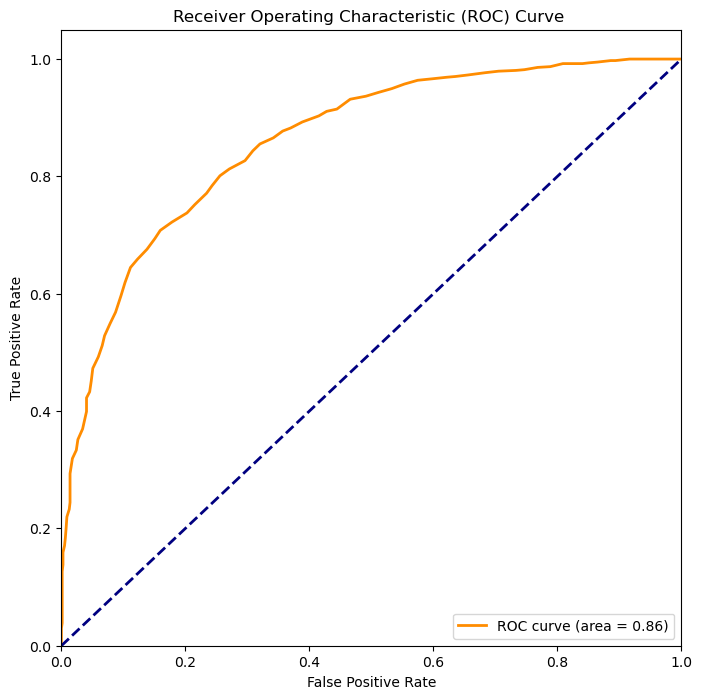

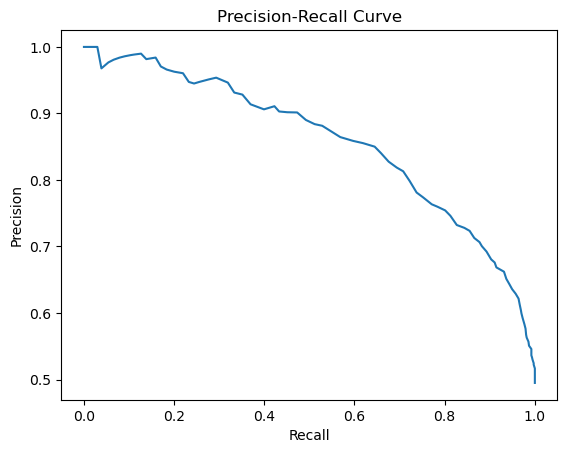

[['All without Engagement metric like', 'All without Engagement metric like', 89, 0.8600488993556406, 0.773936170212766, 0.751937984496124, 0.7627785058977719, 0.7635467980295566, 0.7848101265822784, 0.7740324594257179, 0.73, 0.03, 0.73, 0.74, 0.73, 0.81]]
Removing the feature Engagement metric retweet
['std_retweet_count', 'skew_retweet_count', '75%_retweet_count', 'min_retweet_count', 'iqr_retweet_count', 'kurtosis_retweet_count', '25%_retweet_count', 'max_retweet_count', '50%_retweet_count', 'entropy_retweet_count', 'mean_retweet_count', 'range_retweet_count']
12
89
89
Running the model
Total features  89

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 87)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       790
           1       0.80      0.79      0.79       774

    accuracy                           0.80      1564
   macro avg       0.80      0.80  

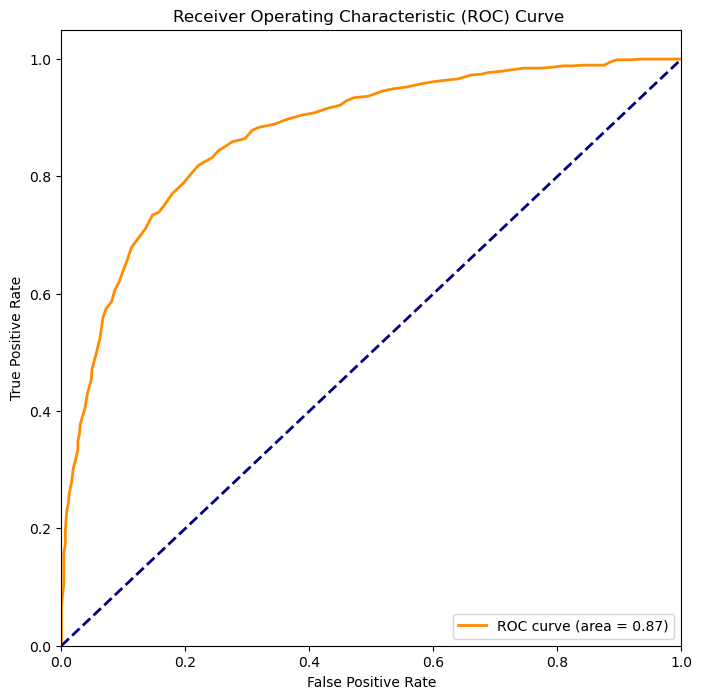

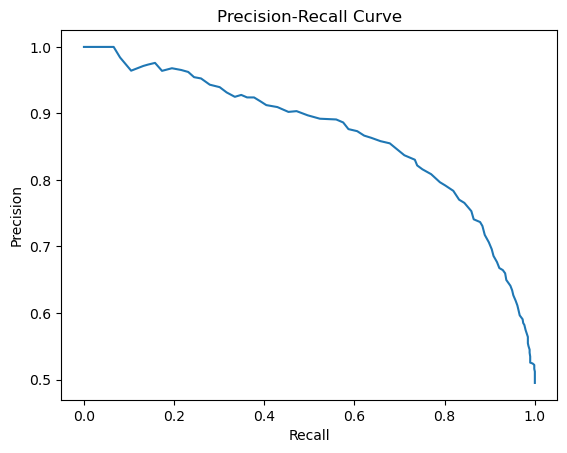

[['All without Engagement metric like', 'All without Engagement metric like', 89, 0.8600488993556406, 0.773936170212766, 0.751937984496124, 0.7627785058977719, 0.7635467980295566, 0.7848101265822784, 0.7740324594257179, 0.73, 0.03, 0.73, 0.74, 0.73, 0.81], ['All without Engagement metric retweet', 'All without Engagement metric retweet', 89, 0.8720120694730644, 0.7966101694915254, 0.789405684754522, 0.7929915639195327, 0.795483061480552, 0.8025316455696202, 0.7989918084436043, 0.75, 0.05, 0.75, 0.76, 0.75, 0.83]]
Removing the feature Engagement metric reply
[]
0
101
101
Running the model
Total features  101

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 99)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       790
           1       0.81      0.81      0.81       774

    accuracy                           0.81      1564
   macro avg       0.81      0.81   

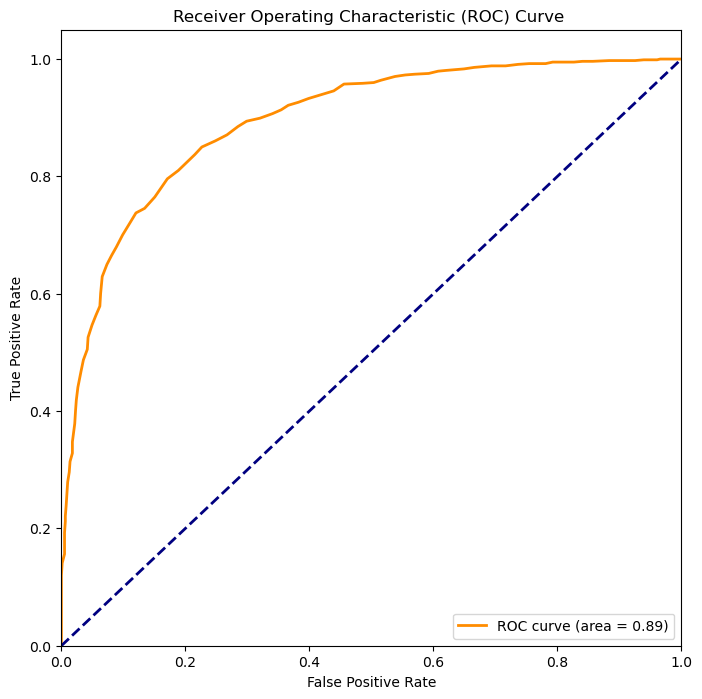

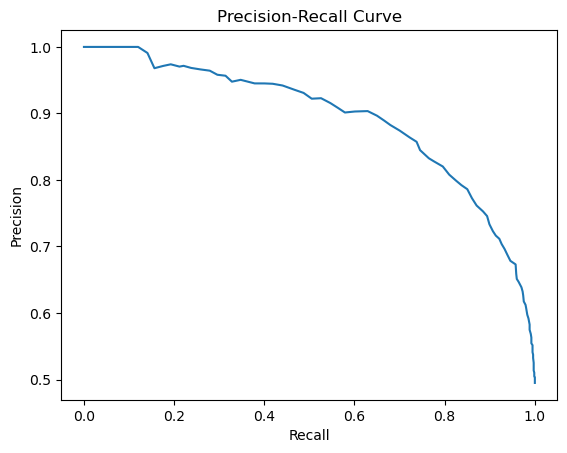

[['All without Engagement metric like', 'All without Engagement metric like', 89, 0.8600488993556406, 0.773936170212766, 0.751937984496124, 0.7627785058977719, 0.7635467980295566, 0.7848101265822784, 0.7740324594257179, 0.73, 0.03, 0.73, 0.74, 0.73, 0.81], ['All without Engagement metric retweet', 'All without Engagement metric retweet', 89, 0.8720120694730644, 0.7966101694915254, 0.789405684754522, 0.7929915639195327, 0.795483061480552, 0.8025316455696202, 0.7989918084436043, 0.75, 0.05, 0.75, 0.76, 0.75, 0.83], ['All without Engagement metric reply', 'All without Engagement metric reply', 101, 0.8943585843718314, 0.8079896907216495, 0.810077519379845, 0.8090322580645162, 0.8134517766497462, 0.8113924050632911, 0.8124207858048161, 0.76, 0.05, 0.76, 0.76, 0.76, 0.85]]


In [7]:
columns_to_keep = list(df_test.columns)

diff_features = {
    'Engagement metric like': 'like_count',
    'Engagement metric retweet': 'retweet_count',
    'Engagement metric reply':' reply_count',
}

print('Running the model')

import copy

all_result = []
for feature in diff_features:
    print(f'Removing the feature {feature}')
    
    feat = diff_features[feature]
    matching_test = [col for col in columns_to_keep if feat in col]

    keep_this = list(set(columns_to_keep) - set(matching_test))

    print(matching_test)
    print(len(matching_test))
    print(len(keep_this))
    
    print(101 - len(matching_test))
    
    print('Running the model')

    df_sample = df_test[keep_this]
    
    total_col = len(keep_this)
    
    print('Total features ', total_col)

    feat = f'All without {feature}'
    feature = f'All without {feature}'

    model, df_pred, roc_auc, prf_1, prf_0, mean_score_f1, std_score_f1, final_score = \
    stat_hp.run_model(df_sample,
                      columns_not_include=[],
                      model_type='random', 
                      pca=False,
                      y_column = 'tweet_label',
                      filename=None,
                      just_f1=False,
                      find_threshold=False
                     )

    #  final_score = {
    #         'mean_f1': mean_score_f1,
    #         'mean_precision': mean_score_precision,
    #         'mean_recall': mean_score_recall,
    #         'mean_auc': mean_score_auc
    # }

    all_result.append([feat, feature, total_col, roc_auc, prf_1[0], 
                       prf_1[1], prf_1[2],
                       prf_0[0], prf_0[1], prf_0[2],
                       mean_score_f1, std_score_f1,
                       final_score['mean_f1'], final_score['mean_precision'],
                       final_score['mean_recall'], final_score['mean_auc']
                      ])
    print(all_result)


filename = './data/engagement_feature_importance_result.pkl.gz'

(pd.DataFrame(data=all_result,
              columns=['feature', 'Feat_Set', 'total_data',
                       'roc', 'precision_1', 'recall_1',
                       'f1_1', 'precision_0', 'recall_0',
                       'f1_0', 'mean_f1', 'std_f1',
                        'mean_f1_CV', 'mean_precision_CV',
                       'mean_recall_CV', 'mean_auc_CV'
                      ]
             )
 
).to_pickle(filename)